<a href="https://colab.research.google.com/github/Bhanukoya/Time-Series-Prediction/blob/master/Time_series_prediction_applying_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series prediction by applying Deep Nueral Networks

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

## Creating a series with trend, seasonality and noise

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Creating the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Updating with noise
series += noise(time, noise_level, seed=42)

# Creating train and validation splits
split_time = 1000     
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20 # taking 20 time steps as input
window = window_size + 1 

In [ ]:
len(x_valid)

461

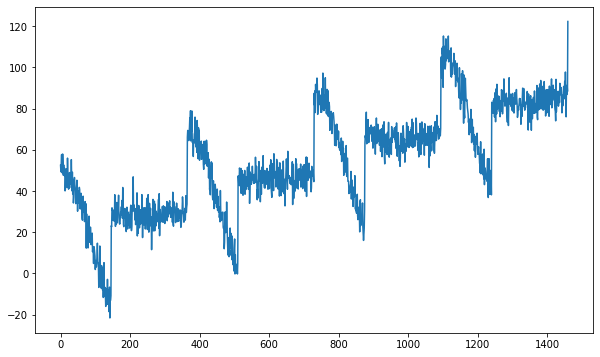

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(time, series)

## Creating windowed data sets 

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(x_train)

In [ ]:
dataset = dataset.window(21, shift=1,drop_remainder=True )

In [ ]:
li = []

for i in dataset: 
  s_li =[]
  for j in i:
    s_li.append(j.numpy())
  li.append(s_li)

In [ ]:
len(li)

980

In [ ]:
import random
random.seed(4)
random.shuffle(li)

## Dividing the dataset list into x and y to feed into the model

In [ ]:
x = []
y = []

for i in li:
  x.append(i[0:-1])
  y.append(i[-1])

In [ ]:
x = np.array(x)
y = np.array(y)

## Building a simple model with one neuron

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
l0 = tf.keras.layers.Dense(1, input_shape=[20])

In [ ]:
model = Sequential([l0])

In [ ]:
model.compile(loss='mse', optimizer='Adam')

In [ ]:
model.fit(x, y ,verbose=1, epochs=100)

Epoch 1/100
31/31 [==============================] - 0s 1ms/step - loss: 121.6132
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 117.8500
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 113.6809
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 110.7940
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 107.8746
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 106.2150
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 105.2308
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 104.6778
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 101.4825
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 99.5344
Epoch 11/100
31/31 [==============================] - 0s 1ms/step - loss: 99.3811
Epoch 12/100
31/31 [==============================] - 0s 1ms/step - loss: 97.4419
Epoch 13/100
31/

In [ ]:
model.evaluate(x,y)

31/31 [==============================] - 0s 1ms/step - loss: 50.3362


50.33623504638672

In [ ]:
len(series)

1461

## Predicting the whole series with our simple model

In [ ]:
pred = []
for i in range(len(series) - 20): 
  pred.append(model.predict(series[i: i + 20 ][np.newaxis]) )


In [ ]:
len(pred)

1441

In [ ]:
pred = np.array(pred)

In [ ]:
pred.shape

(1441, 1, 1)

In [ ]:
pred = pred.reshape(1441)

In [ ]:
pred.shape

(1441,)

In [ ]:
len(pred[1000:])

441

## Taking the required part from our prediction to compare it with the validation data

In [ ]:
new_pred = pred[1000-20:]

In [ ]:
len(new_pred)

461

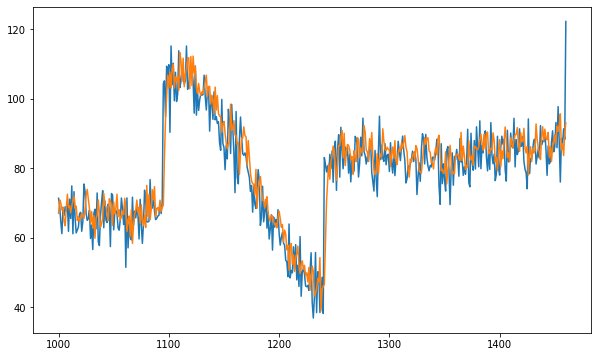

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(time_valid, x_valid)
plt.plot(time_valid, new_pred)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(x_valid, new_pred)

5.3137918

In [ ]:
mean_squared_error(x_valid, new_pred)

49.3503

In [ ]:
l0.get_weights()

[array([[ 0.09750108],
        [-0.17334066],
        [ 0.15647185],
        [-0.13535471],
        [-0.06724004],
        [ 0.07348725],
        [ 0.01350476],
        [ 0.11341452],
        [ 0.06009712],
        [-0.03758165],
        [-0.1570404 ],
        [-0.0295423 ],
        [ 0.09126756],
        [ 0.05806585],
        [ 0.02188681],
        [-0.11711441],
        [ 0.16196832],
        [ 0.19249439],
        [ 0.35393044],
        [ 0.3392594 ]], dtype=float32), array([0.34793416], dtype=float32)]

In [ ]:
l0.get_weights()[0]

array([[ 0.09750108],
       [-0.17334066],
       [ 0.15647185],
       [-0.13535471],
       [-0.06724004],
       [ 0.07348725],
       [ 0.01350476],
       [ 0.11341452],
       [ 0.06009712],
       [-0.03758165],
       [-0.1570404 ],
       [-0.0295423 ],
       [ 0.09126756],
       [ 0.05806585],
       [ 0.02188681],
       [-0.11711441],
       [ 0.16196832],
       [ 0.19249439],
       [ 0.35393044],
       [ 0.3392594 ]], dtype=float32)

In [ ]:
len(l0.get_weights()[0])

20

## Deep Nueral network model

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

#### Here, the Learning rate scheduler object is used to optimize the learnig rate of the gradient descent in our model

This changes the learnign rate  every epoch based on the epoch number

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler

lr = LearningRateScheduler(lambda epoch : 1e-8 * 10**(epoch / 20)) 

In [ ]:
model.compile(loss='mse', optimizer=SGD(learning_rate= 1e-6))

In [ ]:
history = model.fit(x,y,epochs=100, callbacks=[lr])

Epoch 1/100
31/31 [==============================] - 0s 1ms/step - loss: 2806.6318 - lr: 1.0000e-08
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 2748.7505 - lr: 1.1220e-08
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 2685.5281 - lr: 1.2589e-08
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 2616.6680 - lr: 1.4125e-08
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 2541.6147 - lr: 1.5849e-08
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 2460.0789 - lr: 1.7783e-08
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 2371.4189 - lr: 1.9953e-08
Epoch 8/100
31/31 [==============================] - 0s 2ms/step - loss: 2276.1777 - lr: 2.2387e-08
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 2173.7761 - lr: 2.5119e-08
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 2064.1895 - lr: 2.8184e-08

### Plotting learning rate vs loss to pick the best learning rate

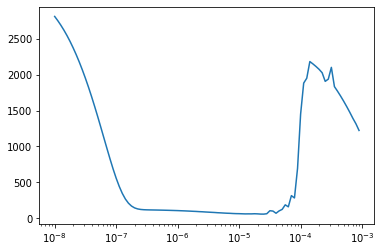

In [ ]:
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

plt.semilogx(lrs, history.history['loss'])

#plt.axis([1e-8, 1e-3, 0, 300])

##### Pick the learnig rate at minumum loss and loss should be stable 

Then, rerun the model at the selcted learning rate (i.e; lr = 6e-5)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"), 
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer=SGD(learning_rate= 6e-5))
history  = model.fit(x,y,epochs=100)

Epoch 1/100
31/31 [==============================] - 0s 1ms/step - loss: 2851.9907
Epoch 2/100
31/31 [==============================] - 0s 1ms/step - loss: 2229.8511
Epoch 3/100
31/31 [==============================] - 0s 1ms/step - loss: 2213.5317
Epoch 4/100
31/31 [==============================] - 0s 1ms/step - loss: 2197.6975
Epoch 5/100
31/31 [==============================] - 0s 1ms/step - loss: 2180.7136
Epoch 6/100
31/31 [==============================] - 0s 1ms/step - loss: 2357.4031
Epoch 7/100
31/31 [==============================] - 0s 1ms/step - loss: 2181.8530
Epoch 8/100
31/31 [==============================] - 0s 1ms/step - loss: 2156.6594
Epoch 9/100
31/31 [==============================] - 0s 1ms/step - loss: 2139.0833
Epoch 10/100
31/31 [==============================] - 0s 1ms/step - loss: 2120.2849
Epoch 11/100
31/31 [==============================] - 0s 1ms/step - loss: 2028.7119
Epoch 12/100
31/31 [==============================] - 0s 1ms/step - loss: 2093.9924
E

### Checking the loss curve

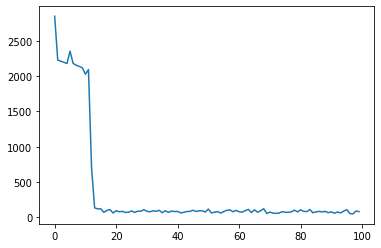

In [ ]:
plt.plot(np.arange(100), history.history['loss'])